In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR import *

In [2]:
backg_c = "midnightblue"
backg_c = "#000044"


## Datos Santiago

In [4]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
df_c = df[(df["Region"] == "Santiago") & (df["Contagiados"] > 0)]

In [6]:
df_c.head()

,Region,Contagiados,Muertes,Recuperados,Fecha,Total_Contagiados,Fecha_dt
6,Santiago,4,0,0.0,3/7/2020,NaN,2020-03-07
22,Santiago,5,0,0.0,3/8/2020,NaN,2020-03-08
38,Santiago,5,0,0.0,3/9/2020,NaN,2020-03-09
54,Santiago,10,0,0.0,3/10/2020,NaN,2020-03-10
70,Santiago,14,0,0.0,3/11/2020,NaN,2020-03-11


In [7]:
i_data = df_c["Contagiados"].values

x_times = (pd.DataFrame(df_c["Fecha_dt"] - df_c["Fecha_dt"].iloc[0])/np.timedelta64(1, 'D')).values.flatten()

print (i_data)
print (x_times)
x_times = x_times[i_data > 50]
i_ini = len(i_data) - len(x_times)
i_data = i_data[i_data > 50]
print (i_ini, i_data, df_c["Contagiados"].values[i_ini])
print (x_times)

[   4    5    5   10   14   23   29   40   54  123  152  174  247  304
  359  409  459  540  682  746  938 1084 1167]
[ 0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5]
8 [  54  123  152  174  247  304  359  409  459  540  682  746  938 1084
 1167] 54
[ 8.   9.  10.  10.5 11.5 12.5 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5
 21.5]


In [8]:
population = 480609
i0 = i_data[0]
s0 = population - i0
e0 = 0
r0 = 0

RMSE, beta, sigma, gamma = GridSearchSEIR (x_times, i_data, s0, e0, i0, r0, backward = True)
print (RMSE, beta, 1./sigma, 1./gamma)

15 15
145.18231843004253 1e-06 0.5 5.0


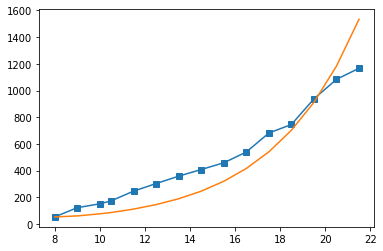

In [9]:
s_c, e_c, i_c, r_c = SEIR_backward(x_times, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (x_times, i_data, marker = "s")
plt.plot (x_times, i_c)

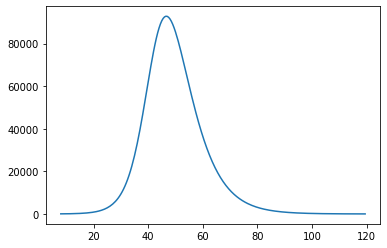

In [10]:
x_times_long = np.arange(x_times[0], 120, 0.5)
s_cl, e_cl, i_cl, r_cl = SEIR_backward(x_times_long, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (x_times_long, i_cl)

In [11]:
population = 480609
i0 = i_data[0]
s0 = population - i0
e0 = 0
r0 = 0

x_times_long = np.arange(0, 120, 1.)
r_times = np.arange(2, len (x_times)+1)
print (r_times)
Is = []

for i_t in r_times:
    RMSE, beta, sigma, gamma = GridSearchSEIR (x_times[:i_t], i_data[:i_t], s0, e0, i0, r0, backward = True)
    print (RMSE, beta, 1./sigma, 1./gamma)
    s_cl, e_cl, i_cl, r_cl = SEIR_backward(x_times_long, s0, e0, i0, r0, beta, sigma, gamma)
    Is.append (i_cl)


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
2 2
0.06161470508166238 1e-05 6.0 8.0
3 3
25.242514404942188 1e-05 11.5 18.5
4 4
25.047320317529447 1e-05 13.0 19.5
5 5
34.84995490693192 1e-05 14.5 10.5
6 6
35.014754213098456 1e-06 0.5 19.5
7 7
46.53475340191209 1e-06 0.5 12.0
8 8
59.4684535370878 1e-06 0.5 9.0
9 9
73.01200641705478 1e-06 0.5 7.5
10 10
81.92955003076015 1e-06 0.5 6.5
11 11
85.5115895364125 1e-06 0.5 6.0
12 12
97.91231587156112 1e-06 0.5 5.5
13 13
110.67820010521703 1e-06 0.5 5.5
14 14
113.84283806563623 1e-06 0.5 5.0
15 15
145.18231843004253 1e-06 0.5 5.0


120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


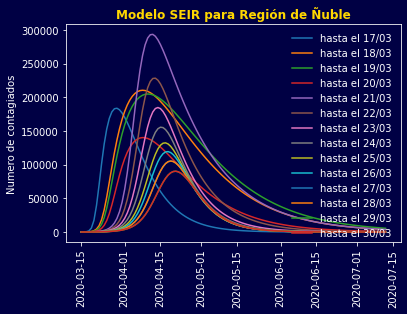

In [12]:
fig= plt.figure()
fig.patch.set_facecolor(backg_c)

x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_], label = "hasta el " + str(x_plot[r_times[i_]].strftime("%d/%m")))
#plt.xlabel ("Días desde el primer contagio")
plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Región de Ñuble", color = "gold", weight = "bold")
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')


120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120


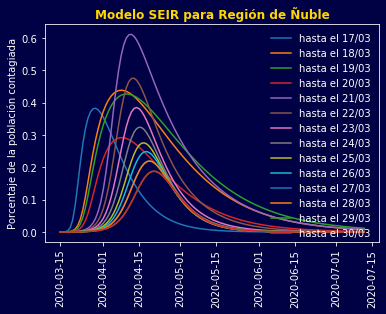

In [13]:
fig= plt.figure()

x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_]/population, label = "hasta el " + str(x_plot[r_times[i_]].strftime("%d/%m")))
#plt.xlabel ("Días desde el primer contagio")
plt.ylabel ("Porcentaje de la población contagiada", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Región de Ñuble", color = "gold", weight = "bold")
fig.patch.set_facecolor(backg_c)
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')


120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120
120 120


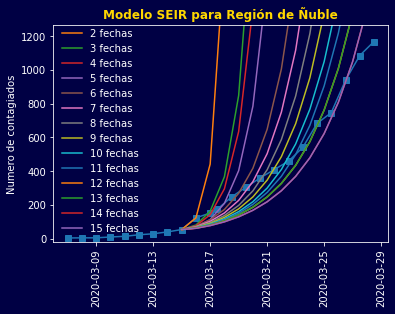

In [14]:
fig= plt.figure()

plt.plot (df_c["Fecha_dt"].values, df_c["Contagiados"].values, marker = "s")
for i_ in range(len(r_times)):
    print (len(x_plot), len(i_cl))
    plt.plot (x_plot, Is[i_], label = str(r_times[i_]) + " fechas")
plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90)
plt.xlim ((df_c["Fecha_dt"].iloc[0] - datetime.timedelta(days=1), 
           df_c["Fecha_dt"].iloc[-1] + datetime.timedelta(days=1)))
plt.ylim ((-20, df_c["Contagiados"].values[-1] + 100))
plt.title ("Modelo SEIR para Región de Ñuble", color = "gold", weight = "bold")

fig.patch.set_facecolor(backg_c)
axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')